## D1 Proposal
### Nomenclating Aliens

Team Member 1: Omar Sinan (osinan)<p>
Team Member 2: Swapnendu Sanyal (swapnens)<p>

### Project Description:
We were recently invaded by aliens from various galaxies. We have managed to somehow fight back but now we want to know more about them. However, we do not have their morphology but only have their DNA samples. We plan on differentiating the species, creating bioweapons tailored to each planet, and retaliate and annihilate them.
	The goal of this project is to predict which planet does a particular DNA sequence belong to. We have a multitude of labeled DNA sequences and we want to predict which planet do the invaders belong to.

### Project Idea:
The way that the QuAM works is by providing it with a DNA sequence of a particular size as input and using the classifier described below, the QuAM will predict the planet that the DNA sequence belongs to.
	We will be building a classifier for this problem using the three methods. Namely, we will be using the normal classifier, k-NN, and k-Means and compare the results to pick the best classifier that solves the problem.
	The QuAM will have a simple user interface that allows the user to input the DNA sequence they want to analyze and its size, after running the classifier on the given input, the QuAM will return the prediction of the planet that the DNA sequence belongs to.



### Divided Spec
Swapnendu:<p>
•	Generate the DNA data by writing a python script.<p>
•	Work on one of the classification methods.<p>
Omar:<p>
•	Feature extraction from the given data.<p>
•	Work on the other two classification methods.<p>

### Data Generation
We are going to write a python script that takes the following input:<p>
1.	Length of the sequence<p>
2.	Number of planets<p>
3.	Number of data points<p>
We are going to randomly generate a string of DNA sequence and make it our first cluster. Now, we keep generating clusters that are significantly far from each other for the remaining clusters randomly. Now, we have the clusters, we randomly generate sequences that belong to those clusters. We will output all the DNA sequences with their labels.


## D2 Dataset Generation

### D2.1 Data Collection

In [44]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs, make_moons, make_circles
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import json

GLOBAL_RANDOM_STATE = 500
random.seed(GLOBAL_RANDOM_STATE)

args = {
    "points": {
        "question": "How many points of a type in the dataset? ",
        "value": None
    },
    "clusters": {
        "question": "How many clusters of a type in the dataset? ",
        "value": None
    },
    "feature_value": {
        "question": "How many feature_values in the dataset? ",
        "value": None
    },
    "length": {
        "question": "How long is a DNA sequence? ",
        "value": None
    }
}


def getInput():
    """
    points -- Number of points to be generated
    clusters -- number of clusters to be generated
    length -- size of the DNA sequence
    feature-value -- Number of different protein-bases possible
                     In humans, it is 4, [A,T,G,C]
    """
    print("We have 5 types of methods to generate data.")
    for k, v in args.items():
        temp = int(input(v["question"]))
        if temp > 0:
            v["value"] = temp
        else:
            print("{} is not a valid input for {}".format(temp, k))
            exit(-1)
    if args["points"]["value"] < 10 * args["clusters"]["value"]:
        print("\nERROR: {} is too large a cluster for {} points.".format(
            args["clusters"]["value"], args["points"]["value"]))
        exit(-1)
    if (args["points"]["value"] >
            args["feature_value"]["value"] ** args["length"]["value"]):
        print(("\nERROR: {} feature_value and DNA of length {} is too small for {}"
               + " points.").format(
            args["feature_value"]["value"], args["length"]["value"],
            args["points"]["value"]))
        exit(-1)

    return {k: v["value"] for k, v in args.items()}


def makeBlobs(data):
    features, targets = make_blobs(n_samples=data["points"],
                                   n_features=data["length"],
                                   centers=data["clusters"],
                                   cluster_std=1.2,
                                   center_box=(0, data["feature_value"]),
                                   shuffle=True,
                                   random_state=GLOBAL_RANDOM_STATE
                                   )
    return (np.abs(np.round(features)).astype(int), targets)


def make_linear_clusters(data):
    features, targets = make_blobs(n_samples=data["points"],
                                   n_features=data["length"],
                                   centers=data["clusters"],
                                   cluster_std=1.2,
                                   center_box=(0, data["feature_value"]),
                                   shuffle=True,
                                   random_state=GLOBAL_RANDOM_STATE
                                   )

    contractFeatures = random.sample(
        list(range(data["length"])),
        random.randint(0, int(0.5*data["length"])))
    for column in range(data["length"]):
        if column in contractFeatures:
            features[:, column] = features[:, column]/(2 + random.random())
    return (np.abs(np.round(features)).astype(int), targets)


def make_noisy_clusters(data):
    small_std = np.arange(0.5, 5, 0.5)
    large_std = np.arange(5, 10, 0.5)
    small_perc = 0.8
    split = int(data["clusters"] * small_perc)
    cluster_std1 = np.random.choice(small_std, split)
    cluster_std2 = np.random.choice(large_std, data["clusters"] - split)
    cluster_std = np.append(cluster_std1, cluster_std2)

    features, targets = make_blobs(n_samples=data["points"],
                                   n_features=data["length"],
                                   centers=data["clusters"],
                                   cluster_std=cluster_std,
                                   center_box=(0, data["feature_value"]),
                                   random_state=GLOBAL_RANDOM_STATE)

    return (np.abs(np.round(features)).astype(int), targets)


def make_moon_clusters(data):
    noise = np.random.choice(np.arange(0.05, 0.1, 0.01), 1)
    features, targets = make_moons(n_samples=data["points"],
                                   noise=noise,
                                   random_state=GLOBAL_RANDOM_STATE)

    new_features = features + abs(np.min(features))
    zeros = np.random.randint(
        -2,2,(data["points"], data["length"] - 2), dtype=int)
    new_features = np.append(new_features, zeros, axis=1)
    return (np.abs(np.round(new_features)).astype(int), targets)


def make_circle_clusters(data):
    noise = np.random.choice(np.arange(0.05, 0.1, 0.01), 1)
    factor = np.random.choice(np.arange(0.1, 0.7, 0.05), 1)
    features, targets = make_circles(n_samples=data["points"],
                                     noise=noise,
                                     factor=factor,
                                     random_state=GLOBAL_RANDOM_STATE)

    new_features = features + abs(np.min(features))
    zeros = np.random.randint(
        -2,2,(data["points"], data["length"] - 2), dtype=int)
    new_features = np.append(new_features, zeros, axis=1)
    return (np.abs(np.round(new_features)).astype(int), targets)

def create(filename="test.csv"):
    data = getInput()
    json.dumps(data,indent=8)
    centerOffset = data["feature_value"]+1

    featureBlob, targetBlob = makeBlobs(data)

    featureLinear, targetLinear = make_linear_clusters(data)
    featureLinear = featureLinear + centerOffset
    targetLinear = targetLinear + np.max(targetBlob) + 1

    featureNoisy, targetNoisy = make_noisy_clusters(data)
    featureNoisy = featureNoisy + 2*centerOffset
    targetNoisy = targetNoisy + np.max(targetLinear) + 1

    featureMoon, targetMoon = make_moon_clusters(data)
    featureMoon = featureMoon + 4*centerOffset
    targetMoon = targetMoon + np.max(targetNoisy) + 1

    featureCircle, targetCircle = make_circle_clusters(data)
    featureCircle = featureCircle + 5*centerOffset
    targetCircle = targetCircle + np.max(targetMoon) + 1

    features = np.concatenate(
        (featureBlob, featureLinear, featureNoisy,featureMoon,featureCircle))
    target = np.concatenate(
        (targetBlob, targetLinear, targetNoisy,targetMoon,targetCircle))



    # fig = plt.figure()
    # ax = fig.add_subplot(111, projection='3d')
    # colorMap = "bgrcmyk"*np.max(target)
    # for i in range(np.max(target)):
    #     feature = features[target == i]
    #     ax.scatter(feature[:, 0], feature[:, 1],feature[:, 2], color=colorMap[i])
    # plt.show()


    df = pd.DataFrame(features, columns=["x{}".format(i) for i in range(data["length"])])
    df_nan = df.mask(np.random.random(df.shape) < .05)
    df_nan["target"] = target
    df_nan.to_csv(filename,index=False)

# create()
print("Your csv has been generated.")

Your csv has been generated.


### D2.2: Data Analysis

In [45]:
import pandas as pd 
data = pd.read_csv("test.csv")

In [46]:
data

,x0,x1,x2,x3,x4,target
0,6.0,2.0,2.0,2.0,3.0,2
1,3.0,5.0,1.0,2.0,1.0,1
2,4.0,4.0,3.0,4.0,NaN,4
3,1.0,2.0,0.0,5.0,0.0,3
4,1.0,3.0,3.0,3.0,2.0,1
...,...,...,...,...,...,...
2495,32.0,30.0,31.0,31.0,32.0,17
2496,32.0,31.0,31.0,32.0,30.0,18
2497,31.0,32.0,30.0,31.0,32.0,18
2498,31.0,30.0,31.0,31.0,31.0,18


In [47]:
data.describe()

,x0,x1,x2,x3,x4,target
count,2376.000000,2388.000000,2384.000000,2365.000000,2380.000000,2500.000000
mean,17.320707,16.567002,16.549497,16.705708,16.022269,10.800000
std,10.354915,10.804045,10.684311,10.417575,10.883884,5.776967
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,7.000000,7.000000,8.000000,6.000000,6.000000
50%,16.000000,14.000000,15.000000,15.000000,14.000000,12.000000
75%,26.250000,26.000000,26.000000,26.000000,25.000000,16.000000
max,33.000000,36.000000,38.000000,35.000000,33.000000,18.000000


In [48]:
features, target = (data.iloc[:,:-1],data.iloc[:,-1])
clusters = np.unique(target)
print("There are {} clusters in the dataset which are:\n{}".format(len(clusters),clusters))
print("\nThe features are of dimension {} * {}.".format(features.shape[0],features.shape[1]))
print("\n\nThe features can be described as follows:")
features.describe()

There are 19 clusters in the dataset which are:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]

The features are of dimension 2500 * 5.


The features can be described as follows:


,x0,x1,x2,x3,x4
count,2376.000000,2388.000000,2384.000000,2365.000000,2380.000000
mean,17.320707,16.567002,16.549497,16.705708,16.022269
std,10.354915,10.804045,10.684311,10.417575,10.883884
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,7.000000,7.000000,8.000000,6.000000
50%,16.000000,14.000000,15.000000,15.000000,14.000000
75%,26.250000,26.000000,26.000000,26.000000,25.000000
max,33.000000,36.000000,38.000000,35.000000,33.000000


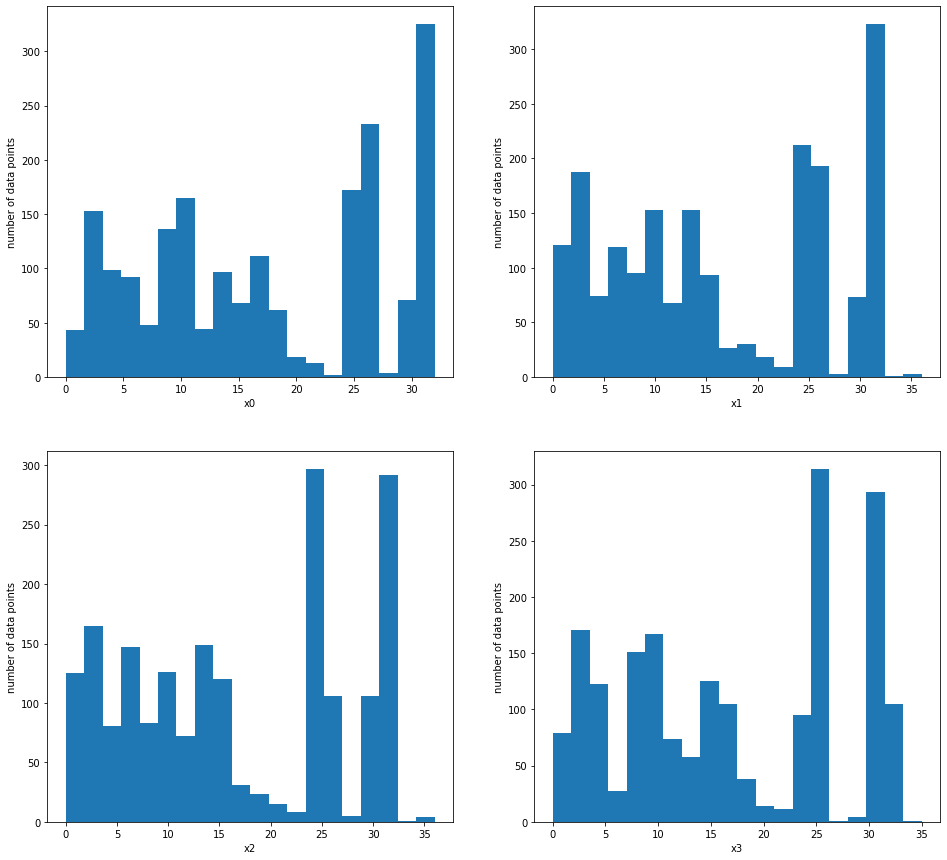

In [49]:
import math
rows = int(math.sqrt(features.shape[1]))
cols = features.shape[1] // rows
figure, subplots = plt.subplots(rows,cols, figsize=(16,15))
for i in range(rows):
    for j in range(cols):
        subplots[i,j].set_xlabel(data.columns[rows*i+j])
        subplots[i,j].set_ylabel("number of data points")
        subplots[i,j].hist(features.dropna().iloc[:,rows*i+j].transpose(),bins=20)

We notice no definite shape (eg. Gaussian) in the feature distribution. However, one can easily observe that the plots are almost identical in shape.

In [50]:
print(f"There are {np.sum(np.sum(np.isnan(features)))} nan values in total.")
for featureName in features.columns:
    print(f"Feature '{featureName}' has {np.sum(np.isnan(features.loc[:,featureName]))} nan values.")

There are 607 nan values in total.
Feature 'x0' has 124 nan values.
Feature 'x1' has 112 nan values.
Feature 'x2' has 116 nan values.
Feature 'x3' has 135 nan values.
Feature 'x4' has 120 nan values.


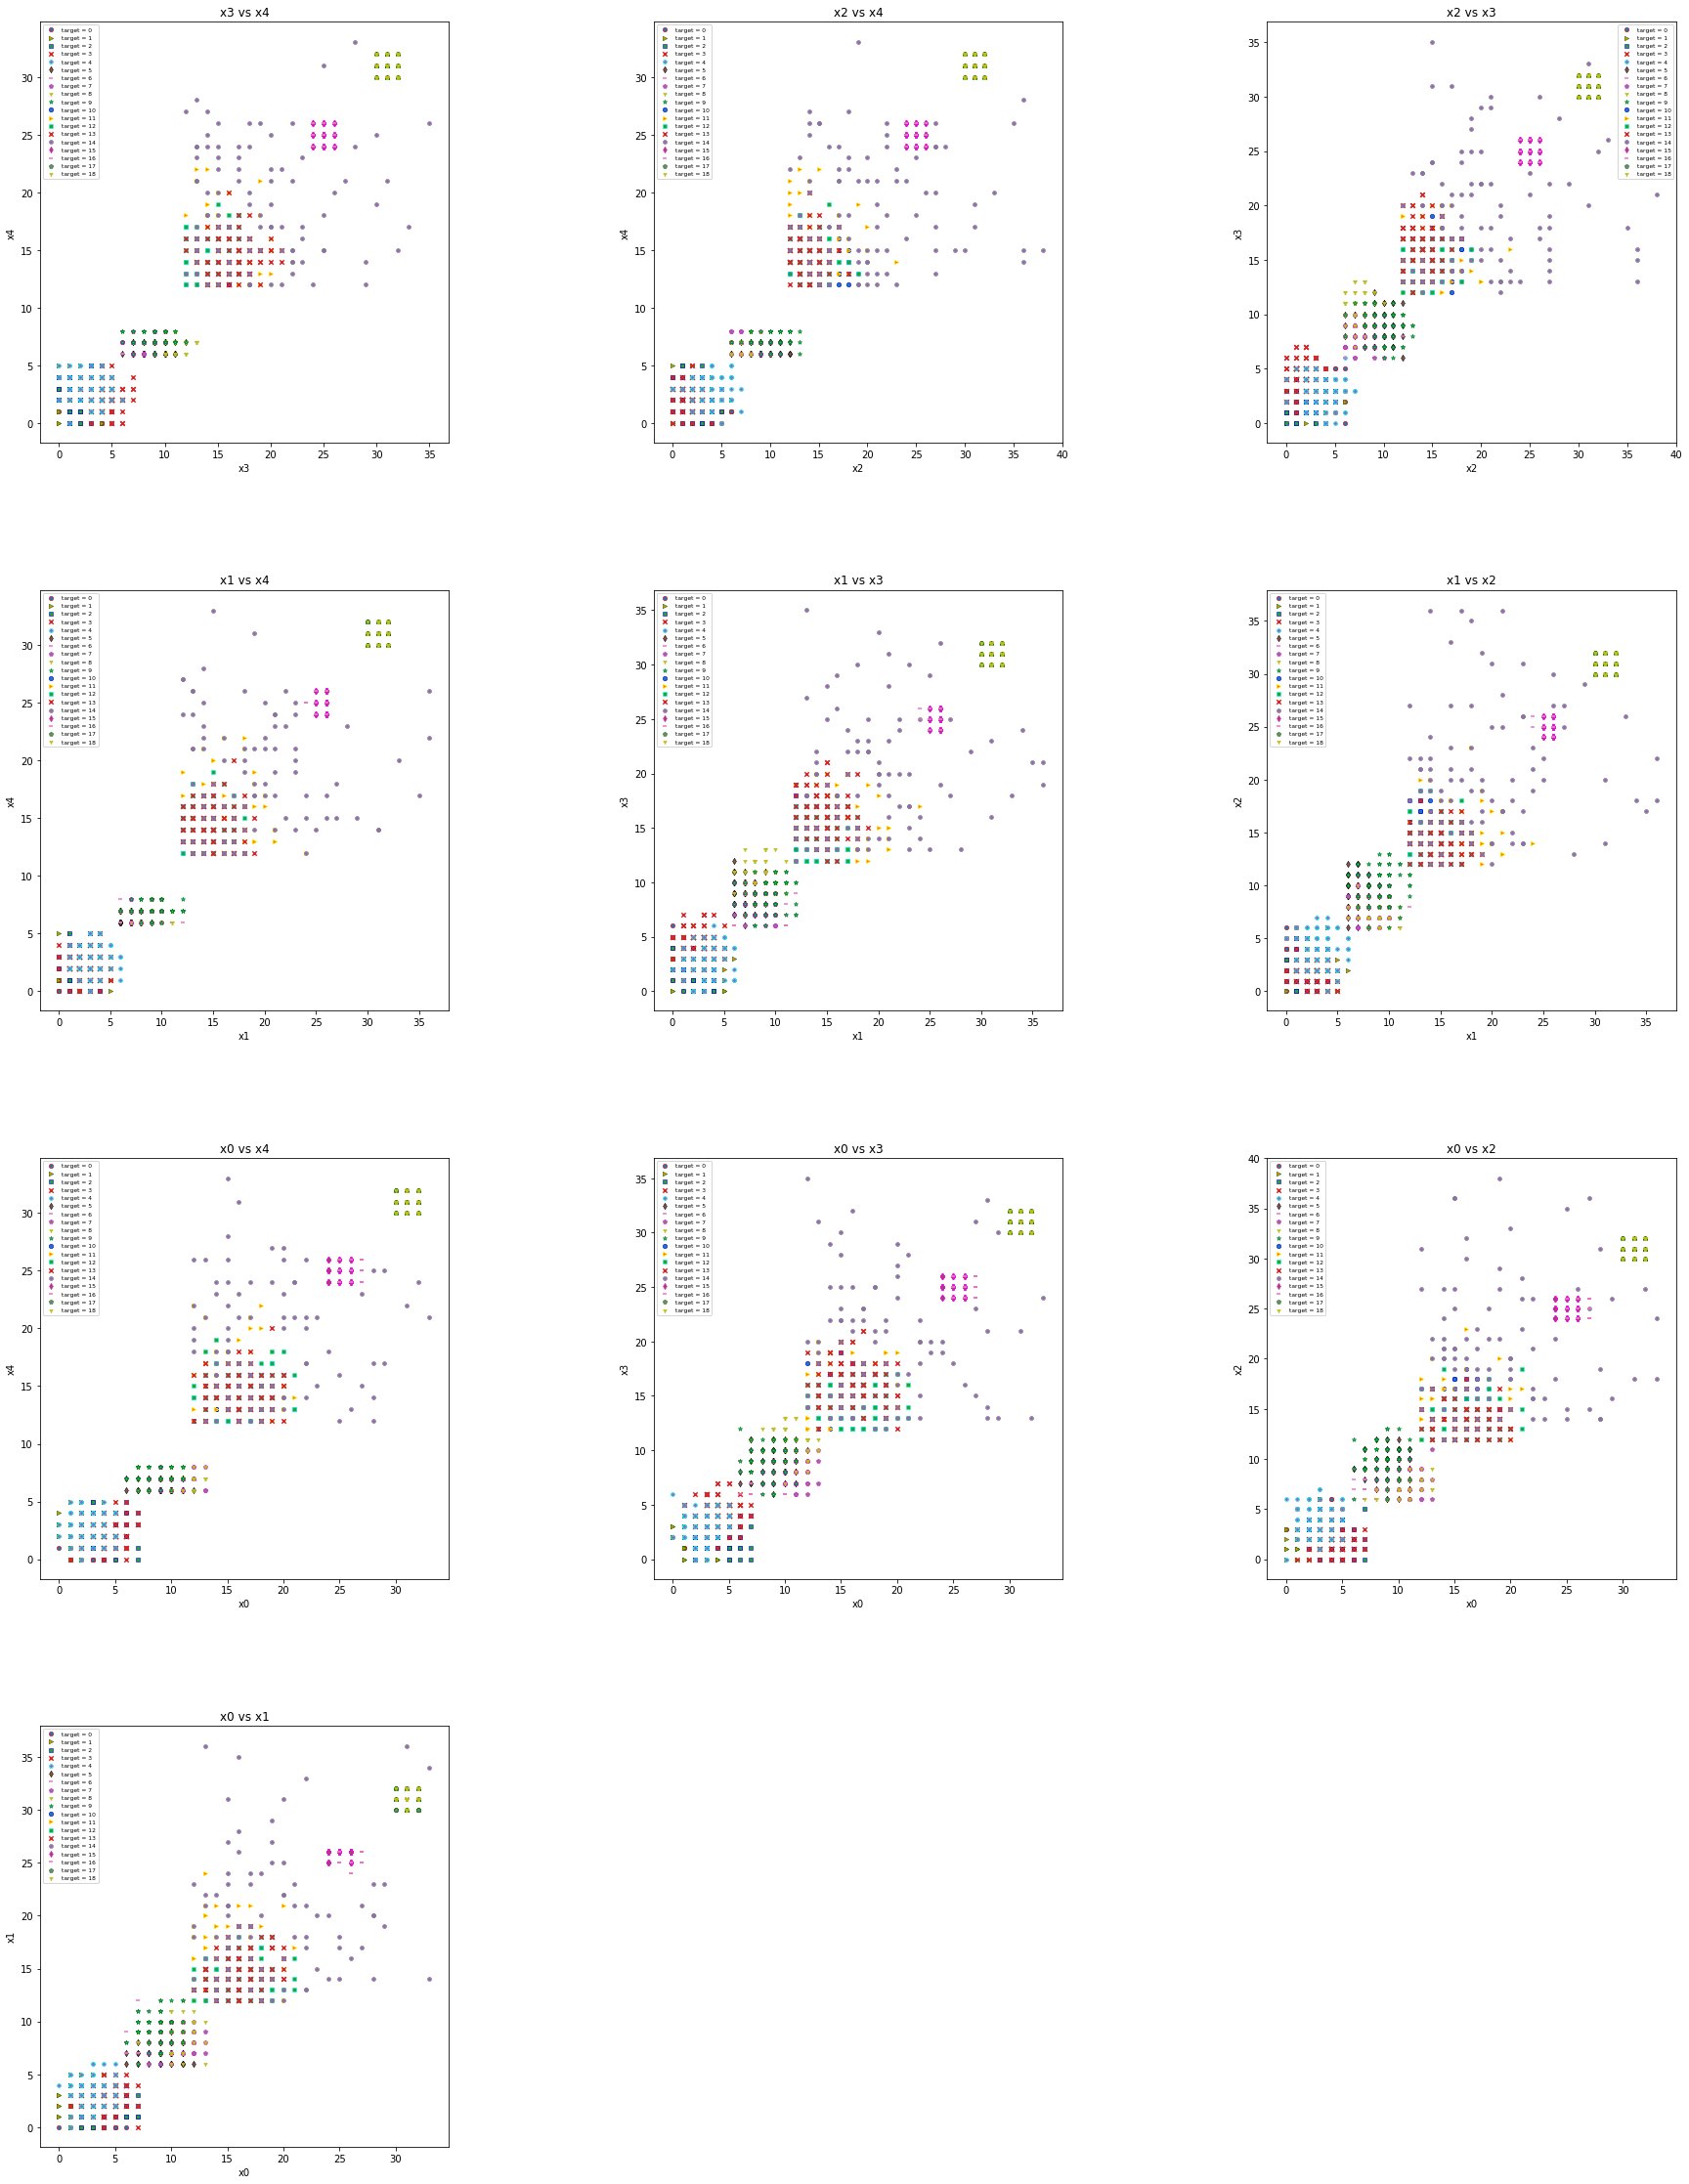

In [51]:
import itertools
feature_pairings = list(itertools.combinations(features.columns,2))
cols = 3
rows = math.ceil(len(feature_pairings)/cols)
figure, subplots = plt.subplots(rows, cols, figsize=(10*cols, 10*rows))

colors = ['r', 'g', 'b', 'yellow', 'cyan', 'black', 'gray', 'magenta']*len(np.unique(target))
markers = ['o', '>', 's', 'x', 'P', 'd', '_', 'p', '1', '*']*len(np.unique(target))

for i in range(rows):
    for j in range(cols):
        if feature_pairings:
            feature1, feature2  = feature_pairings.pop()        
            subplots[i,j].set_xlabel(feature1)
            subplots[i,j].set_ylabel(feature2)
            for t in set(target):
                subplots[i,j].scatter(features.loc[target == t,feature1],
                                    features.loc[target == t,feature2],
                                    marker = markers[t],
                                    edgecolors = colors[t],
                                    linewidths=0.55, s=20, label='target = {}'.format(t))
                subplots[i,j].set_title(f"{feature1} vs {feature2}")
            subplots[i,j].legend(prop={"size":6})
        else:
            subplots[i,j].set_visible(False)
    
plt.subplots_adjust(left=None, bottom=None, right=None, 
                    top=None, wspace=0.5, hspace=0.35) 

Although from the plots one can assume that every feature is linearly correlated, we claim that there is no correlation between the features. Since we cannot show the other features, the different types of points are projected into a 2-D plane. However, you can easily notice that there are many overlapping points. Moreover, this mirage of linearity appears because of the way we separate clusters of different types during data generation.

### D2.3: Data Wrangling

In [52]:
total_nan = np.sum(np.sum(features.isnull()))
print('Total non-numeric entries: {}'.format(total_nan))

Total non-numeric entries: 607


In [53]:
drop_threshold = 0.3
m = np.sum(np.sum(features.isnull()))
n = features.shape[0] * features.shape[1]

# Drop rows with too many missing entries
r = features.shape[1]
df = features.dropna(axis=0, thresh=features.shape[1] - (r * drop_threshold))

# Drop columns with too many missing entries
c = len(features)
df = df.dropna(axis=1, thresh=len(data) - (c * drop_threshold))

In [54]:
total_nan = np.sum(np.sum(df.isnull()))
print('Total non-numeric entries: {}'.format(total_nan))

Total non-numeric entries: 483


In [55]:
df = df.apply(lambda x: x.fillna(int(x.mode()))).astype(int)

In [56]:
total_nan = np.sum(np.sum(df.isnull()))
print('Total non-numeric entries: {}'.format(total_nan))

Total non-numeric entries: 0


### D2.4: Feature Engineering

In [58]:
#Getting dummy features
df = pd.get_dummies(df,prefix=df.columns,columns = df.columns)
df

,x0_0,x0_1,x0_2,x0_3,x0_4,x0_5,x0_6,x0_7,x0_8,x0_9,...,x4_23,x4_24,x4_25,x4_26,x4_27,x4_28,x4_30,x4_31,x4_32,x4_33
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [60]:
print("The shape of the new dataframe is {}".format(df.shape))

The shape of the new dataframe is (2439, 173)
